<a href="https://colab.research.google.com/github/siddharth0517/k-Compress-Image-Compression-Using-KMeans-Clustering/blob/main/K_Compress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression Using K-means Clustering

**1. Importing Libraries**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**2. Loading Image**

In [2]:
image = cv2.imread('download.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

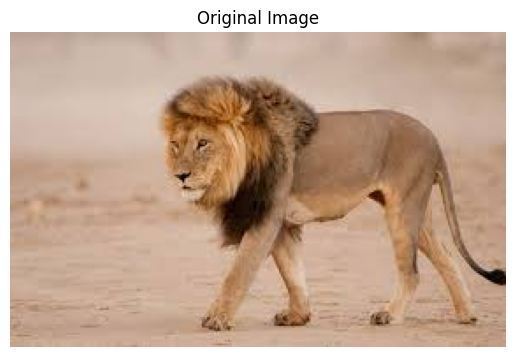

In [3]:
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

**3. Reshape the Image Data**

In [4]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

**4. Using Elbow Method to find Optimal n**

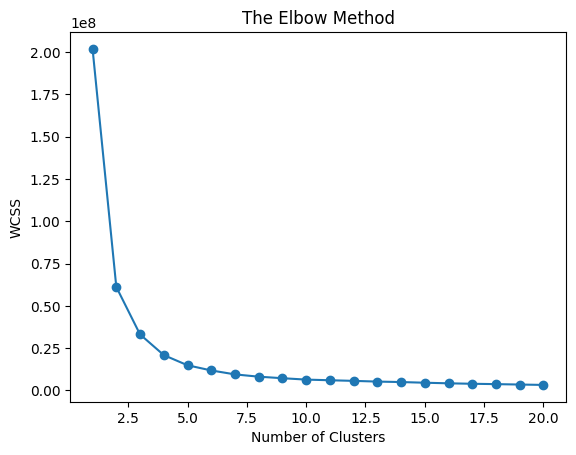

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters= i,random_state=42)
    kmeans.fit(pixel_values)
    wcss.append(kmeans.inertia_)
plt.plot(list(range(1, 21)), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**5. Train The Model**

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pixel_values)


centers = kmeans.cluster_centers_
labels = kmeans.labels_

**6. Replace Each Pixel with Its Cluster Center**

In [14]:
compressed_image = centers[labels]
compressed_image = np.reshape(compressed_image, image.shape)
compressed_image = np.uint8(compressed_image)

**7. Displaying Compressed Image**

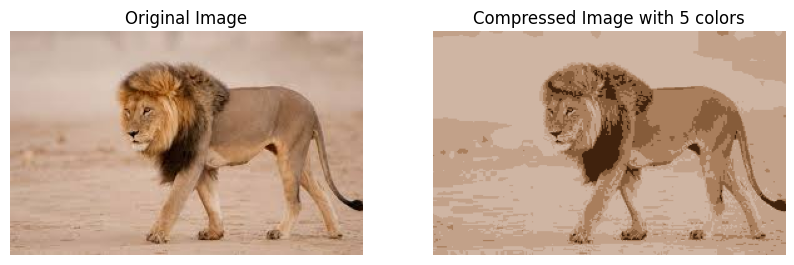

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title(f'Compressed Image with 5 colors')
plt.axis('off')

plt.show()


**8. Saving Image**

In [16]:
compressed_image_bgr = cv2.cvtColor(compressed_image, cv2.COLOR_RGB2BGR)
compressed_image_path = 'compressed_image.jpeg'
cv2.imwrite(compressed_image_path, compressed_image_bgr)

True